# 

# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Setup Complete")


Setup Complete


In [2]:
#Loading Dataset
song = pd.read_csv("../input/34740-hit-and-nonhit-songs-spotify-features/complete.csv")

In [3]:
song.head(3)

,track_title,artist_name,track_id,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
0,Red Planet - Red Planet Radio,Joe,3FeufAV1f6fajILIQuAXMw,256080,0.968,7,0,4,0.02150,0.698,0.862,0.1110,-11.012,0.0337,0.3900,136.884,0
1,Red Planet - Red Planet Extended,Joe,2o7oYjZuo3S2QitY4R5dII,395442,0.970,2,1,4,0.00339,0.724,0.896,0.1060,-8.415,0.0358,0.4320,136.868,0
2,Basejump,Robin Schulz,6nWoNNkfffbmHU9z3kGPao,391680,0.406,5,0,4,0.00433,0.803,0.825,0.0948,-9.444,0.0608,0.0769,125.014,0


# Data Exploration And Pre-Processing

In [4]:
# Total Number Of Unique Artists. 
song["artist_name"].nunique()

10767

In [5]:
# Number Of Artists Who produced Hit Song.
song[song["On_chart"]==1]['artist_name'].nunique()

4810

In [6]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34740 entries, 0 to 34739
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_title       34739 non-null  object 
 1   artist_name       34739 non-null  object 
 2   track_id          34740 non-null  object 
 3   duration_ms       34740 non-null  int64  
 4   energy            34740 non-null  float64
 5   key               34740 non-null  int64  
 6   mode              34740 non-null  int64  
 7   time_signature    34740 non-null  int64  
 8   acousticness      34740 non-null  float64
 9   danceability      34740 non-null  float64
 10  instrumentalness  34740 non-null  float64
 11  liveness          34740 non-null  float64
 12  loudness          34740 non-null  float64
 13  speechiness       34740 non-null  float64
 14  valence           34740 non-null  float64
 15  tempo             34740 non-null  float64
 16  On_chart          34740 non-null  int64 

In [7]:
song.describe()
# So as we Can See There Are Some Outliers IN the Data fro column outliers

,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
count,3.474000e+04,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000
mean,2.189765e+05,0.595010,5.256477,0.646488,3.905325,0.288852,0.601277,0.184090,0.189592,-9.920885,0.096678,0.510255,119.940155,0.501583
std,1.208879e+05,0.237959,3.604624,0.478067,0.472741,0.309841,0.180962,0.337521,0.164997,5.733902,0.113405,0.268062,29.146159,0.500005
min,3.203000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,1.739705e+05,0.445000,2.000000,0.000000,4.000000,0.029900,0.499000,0.000000,0.092900,-12.173000,0.035400,0.299000,99.019000,0.000000
50%,2.120000e+05,0.624000,5.000000,1.000000,4.000000,0.160000,0.624000,0.000069,0.123000,-8.554000,0.049200,0.514000,120.016000,1.000000
75%,2.516735e+05,0.781000,8.000000,1.000000,4.000000,0.482000,0.733000,0.105000,0.231000,-6.017000,0.097100,0.729000,137.025750,1.000000
max,5.610020e+06,1.000000,11.000000,1.000000,5.000000,0.996000,0.988000,1.000000,0.999000,2.291000,0.966000,1.000000,247.951000,1.000000


<AxesSubplot:xlabel='loudness', ylabel='danceability'>

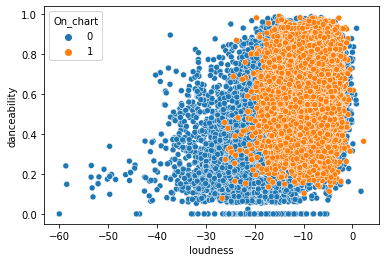

In [8]:
sns.scatterplot(x='loudness',y='danceability',hue='On_chart',data=song)

<AxesSubplot:xlabel='loudness', ylabel='energy'>

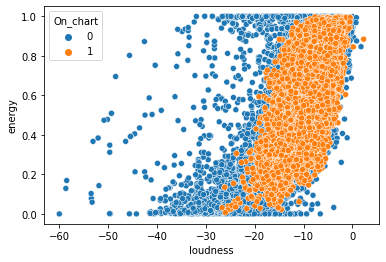

In [9]:
sns.scatterplot(x='loudness',y='energy',hue='On_chart',data=song)

<AxesSubplot:>

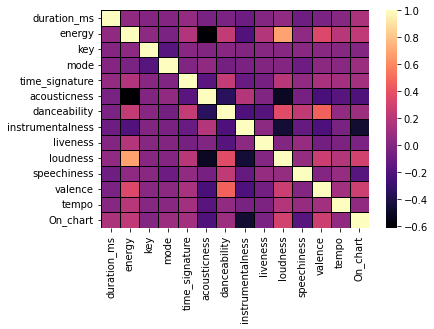

In [10]:
sns.heatmap(song.corr(),cmap='magma',linecolor='black',linewidth=0.8)

Total Songs Below -40 Loudness:  47


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


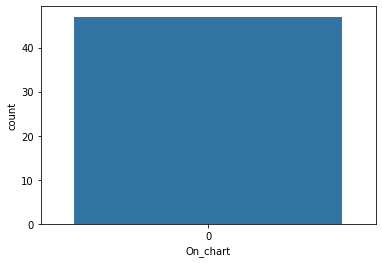

In [11]:
sns.countplot(song[song["loudness"]<=-40]["On_chart"])
print("Total Songs Below -40 Loudness: ",song[song["loudness"]<=-40]["loudness"].count())
# So As Not A Single Song Is Hit If The Loudness in Below -40
# So Will change loudness to -30 for every song which is below loudness -40

In [12]:
for a in range(song.shape[0]):
    if song['loudness'][a] < -40.00:
        song['loudness'][a] = -40.00
    else:
        pass

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Splitting Data

In [13]:
(23.4+32.5+41.6+36.4+49.4)/5

36.660000000000004

In [14]:
#importing library
from sklearn.model_selection import train_test_split

In [15]:
song.head(0)

,track_title,artist_name,track_id,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart


In [16]:
# selecting featues and target
feature = song.drop(['track_title','artist_name','track_id','On_chart'],axis=1)
target = song['On_chart']

In [17]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

# Training Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier()

In [20]:
model.fit(X_train,y_train)

RandomForestClassifier()

# Prediction 

In [21]:
# Predicting Hit Song For Test Data
prediction = model.predict(X_test)

In [22]:
prediction

array([0, 0, 0, ..., 0, 1, 0])

# Evaluation

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))
print("\nClassification Report:\n",classification_report(y_test,prediction))
print("Accuracy Score: ",accuracy_score(y_test,prediction))

Confusion Matrix:
 [[2674  784]
 [ 477 3013]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      3458
           1       0.79      0.86      0.83      3490

    accuracy                           0.82      6948
   macro avg       0.82      0.82      0.82      6948
weighted avg       0.82      0.82      0.82      6948

Accuracy Score:  0.8185089234312032


In [25]:
X_train.head(2)

,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo
26756,392400,0.559,0,0,4,0.00346,0.416,0.085,0.1480,-10.751,0.0349,0.152,137.170
6230,149943,0.457,9,0,4,0.04710,0.647,0.954,0.0402,-14.525,0.0429,0.938,135.103


In [26]:
# Let's Predict Random Value Data 
newsong_info = [[255789,0.786,1,1,4,0.08722,0.998,0.756,0.5846,-9.585,0.0865,0.878,185.658]]
val = model.predict(newsong_info)
if val==0:
    print("Not A Hit Song")
else:
    print("Hit Song")

Hit Song


# Thank You 